In [21]:
#Give a group image containing the object to be searched(waldo) and a reference image of the object(waldo)

In [3]:
#top left position (row, column) of Waldo's face is stored in 2-tupel top_left
#the Frobenius norm of the difference of the region is stored in floating point number min_diff

In [4]:
#The program will highlight where Waldo is if Waldo is found in the image

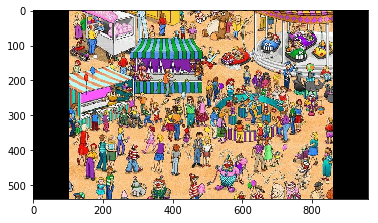

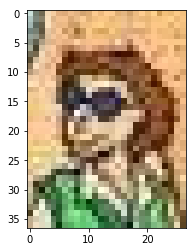

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

#input your group image here
temp1 = Image.open('group.jpg')
#input your waldo image here
temp2 = Image.open('waldo.jpg')

plt.figure()
temp1view = np.array(temp1)
plt.imshow(temp1)
plt.figure()
temp1view = np.array(temp2)
plt.imshow(temp2)

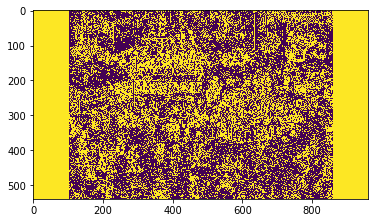

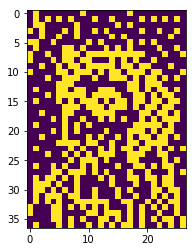

In [9]:
#Preparation

# Convert to black&white
temp1 = temp1.convert('1')
temp2 = temp2.convert('1')
# Creates an array, white pixels==True and black pixels==False
A = np.array(temp1)
B = np.array(temp2)
#New array with same size as A
group_image = np.empty((A.shape[0],A.shape[1]),None)   
waldo_image = np.empty((B.shape[0],B.shape[1]),None)

for i in range(len(A)):
    for j in range(len(A[i])):
        if A[i][j]==True:
            group_image[i][j]=0
        else:
            group_image[i][j]=1

for i in range(len(B)):
    for j in range(len(B[i])):
        if B[i][j]==True:
            waldo_image[i][j]=0
        else:
            waldo_image[i][j]=1            

plt.figure()
plt.imshow(group_image)
plt.figure()
plt.imshow(waldo_image)

In [10]:
ww = len(waldo_image[0])
lw = len(waldo_image)
min_diff = 10000000000000000000000
top_left = (0,0)
#search every block in the group: y is row, x is coloum
for y in range(0,len(group_image)-lw+1):
    for x in range(0,len(group_image[0])-ww+1):
        #get part of group image
        part = group_image[y:y+lw,x:x+ww]
        #take diff with waldo
        diff = waldo_image - part
        #get norm
        norm = np.linalg.norm(diff)
        #compare with min_diff
        if norm < min_diff:
            min_diff = norm
            top_left = (y,x)
#search done,highlight waldo in group_iamge
row = top_left[0]
coloum = top_left[1]
for i in range(row,row+lw):
    for j in range(coloum,coloum+ww):
        group_image[i][j] = 5 * group_image[i][j] 
for i in range(0,len(group_image)):
    for j in range(0,len(group_image[0])):
        group_image[i][j] = 0.2 * group_image[i][j]

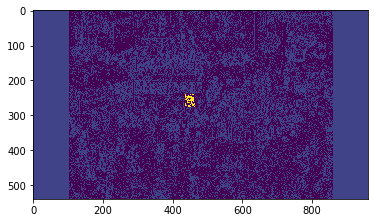

In [14]:
plt.figure()
plt.imshow(group_image)

In [22]:
print ('Waldo is at: %s'%(top_left,))
print ('The difference of searching object with highlight object is %f with respect to 1-norm' %(min_diff))


Waldo is at: (240, 436)
The difference of searching object with highlight object is 16.124515 with respect to 1-norm
